In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Load your data
df = pd.read_csv("Nigeria_Inflation.csv")

In [4]:
#Let's fix this by specifying the correct delimiter (most likely a comma) 
#and properly splitting it into individual columns. 

df = pd.read_csv("Nigeria_Inflation.csv", header=None)
split_df = df[0].str.split(",", expand=True)
split_df.columns = split_df.iloc[0]
df = split_df[1:].reset_index(drop=True)

In [5]:
# Combine 'Year' and 'Month' into a datetime column
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'], errors='coerce')

In [7]:
df

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education,Date
0,2008,1,8.60,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466,2008-01-01
1,2008,2,8.00,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619,2008-02-01
2,2008,3,7.80,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847,2008-03-01
3,2008,4,8.20,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248,2008-04-01
4,2008,5,9.70,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442,2008-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024,2,31.70,86.08,1.32,0.87,846.846533,543.893969,494.844568,570.034088,234.228948,469.899712,2024-02-01
194,2024,3,33.20,88.80,1.23,0.78,877.472863,558.813016,502.912687,579.821453,234.694654,476.890292,2024-03-01
195,2024,4,33.69,93.12,1.28,0.83,899.453386,571.960431,510.095879,592.282753,235.335975,483.719840,2024-04-01
196,2024,5,33.95,84.01,1.25,0.80,920.005281,583.894158,517.391784,606.408076,235.850405,490.779792,2024-05-01


In [8]:
df.sort_values("Date", inplace=True)

In [10]:
# Scale the inflation values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[["Inflation_Rate"]])

In [11]:
# Create sequences (e.g., 12 months to predict next month)
def create_sequences(data, seq_length=12):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12
X, y = create_sequences(scaled_data, seq_length)

In [12]:
#Split into Train/Test Sets

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [13]:
#GRU Model Building & Training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define GRU model
gru_model = Sequential([
    GRU(50, return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=5)


C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Train model
gru_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),
              callbacks=[early_stop], verbose=1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 313ms/step - loss: 0.0526 - val_loss: 0.3084
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0205 - val_loss: 0.1694
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0088 - val_loss: 0.0910
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0091 - val_loss: 0.0647
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0097 - val_loss: 0.0703
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0068 - val_loss: 0.0822
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0062 - val_loss: 0.0845
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0055 - val_loss: 0.0780
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0055 - val_loss: 0.0623
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0042 - val_loss: 0.0451
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0037 - val_loss: 0.0327
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0035 - val_loss: 0.026

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step


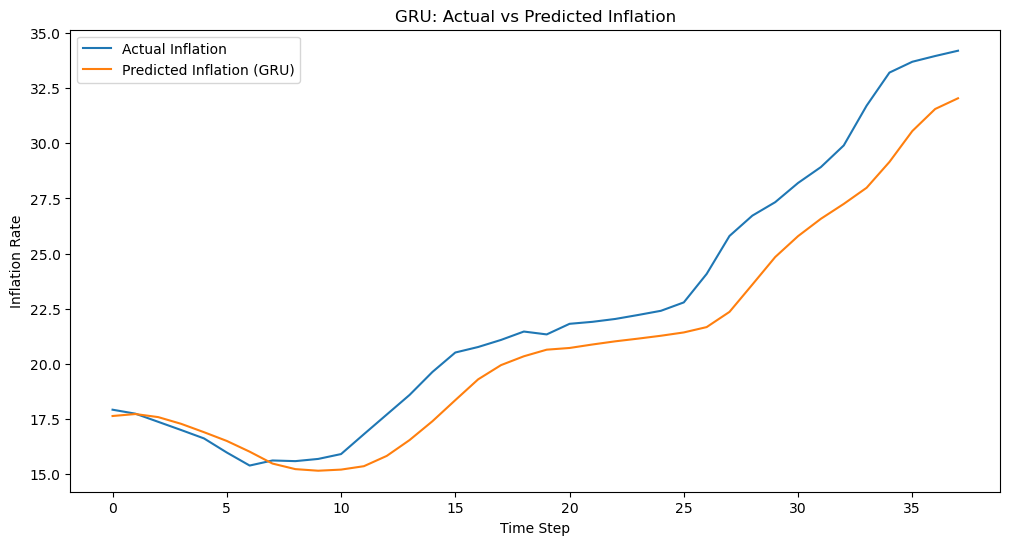

In [15]:
import matplotlib.pyplot as plt

# Predict
y_pred = gru_model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

# Plot
plt.figure(figsize=(12,6))
plt.plot(y_test_inverse, label='Actual Inflation')
plt.plot(y_pred_inverse, label='Predicted Inflation (GRU)')
plt.title('GRU: Actual vs Predicted Inflation')
plt.xlabel('Time Step')
plt.ylabel('Inflation Rate')
plt.legend()
plt.show()